# 인공신경망 모델의 학습

- 3장에서 설명한 부분을 제외하고 주석을 달았습니다.
- y = x^2+3

## 필요한 라이브러리 불러오기

In [1]:
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math

x_test_path = 'E:/X_test.txt'
y_test_path = 'E:/Y_test.txt'

# 파일을 읽어오기
f_x = open(x_test_path, 'r')
f_y = open(y_test_path, 'r')
lines_x = f_x.readlines()
lines_y = f_y.readlines()

# 읽어온 데이터를 리스트로 변경 # 2947개의 라인
list_x = [x for x in lines_x]
list_y = [y for y in lines_y]

# 리스트에서 마지막에 들어가는 개행문자 제거
for i in range(0, len(list_x)):
    list_x[i] = list_x[i].rstrip()
    list_y[i] = list_y[i].rstrip()
    # 한줄로 되어있는 리스트를 128개로 분할 # 128개의 데이터
    list_x[i] = list_x[i].split()
    list_y[i] = list_y[i].split()

# 리스트를 실수형 넘파이로 변경
test_x = np.asarray(list_x, 'float32')
test_y = np.asarray(list_y, 'float32')
print(test_x.shape)
print(test_y.shape)

(2947, 561)
(2947, 1)


In [2]:
x_train_path = 'E:/X_train.txt'
y_train_path = 'E:/Y_train.txt'
f_x = open(x_train_path, 'r')
f_y = open(y_train_path, 'r')
lines_x = f_x.readlines()
lines_y = f_y.readlines()
list_x = [x for x in lines_x]
list_y = [y for y in lines_y]

for i in range(0, len(list_x)):
    list_x[i] = list_x[i].rstrip()
    list_y[i] = list_y[i].rstrip()
    # 한줄로 되어있는 리스트를 128개로 분할 # 128개의 데이터
    list_x[i] = list_x[i].split()
    list_y[i] = list_y[i].split()
    
train_x = np.asarray(list_x, 'float32')
train_y = np.asarray(list_y, 'float32')
print(train_x.shape)
print(train_y.shape)

(7352, 561)
(7352, 1)


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

## 데이터 생성

In [4]:
num_data = 1000
num_epoch = 10000

train_x = torch.from_numpy(train_x)
train_y = torch.from_numpy(train_y)

test_x = torch.from_numpy(test_x)
test_y = torch.from_numpy(test_y)

In [5]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

print(train_y.dtype)

torch.Size([7352, 561])
torch.Size([7352, 1])
torch.Size([2947, 561])
torch.Size([2947, 1])
torch.float32


# 모델, 손실 함수, 최적화 함수 설정

In [6]:
model = nn.Sequential(
          nn.Linear(561,250),
          nn.ReLU(),
          nn.Linear(250,100),
          nn.ReLU(),
          nn.Linear(100,10),
          nn.ReLU(),
          nn.Linear(10,1),
      )

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.0002)

## 모델의 학습

In [7]:
loss_array = []
for i in range(num_epoch):
    #train_x = train_x.to(device)
    #train_y = train_y.to(device)
    
    optimizer.zero_grad()
    output = model(train_x)
    
    loss = loss_func(output,train_y)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)

## 손실 그래프

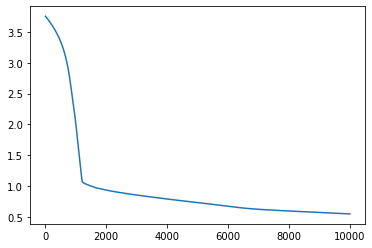

In [8]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()

## 학습된 모델의 결과값과 실제 목표값의 비교

In [9]:
print(train_x.detach().numpy().shape)
print(train_y.detach().numpy().shape)

(7352, 561)
(7352, 1)


In [10]:
# 맞은 개수, 전체 개수를 저장할 변수를 지정합니다.
correct = 0
total = 0

# 인퍼런스 모드를 위해 no_grad 해줍니다.
with torch.no_grad():
    # 테스트로더에서 이미지와 정답을 불러옵니다.
    for test_x, test_y in test_loader:
        
        # 두 데이터 모두 장치에 올립니다.
        x = test_x.to(device)
        y_= test_y.to(device)

        # 모델에 데이터를 넣고 결과값을 얻습니다.
        output = model.forward(x)
        
        # https://pytorch.org/docs/stable/torch.html?highlight=max#torch.max
        # torch.max를 이용해 최대 값 및 최대값 인덱스를 뽑아냅니다.
        # 여기서는 최대값은 필요없기 때문에 인덱스만 사용합니다.
        _,output_index = torch.max(output,1)
        
        # 전체 개수는 라벨의 개수로 더해줍니다.
        # 전체 개수를 알고 있음에도 이렇게 하는 이유는 batch_size, drop_last의 영향으로 몇몇 데이터가 잘릴수도 있기 때문입니다.
        total += label.size(0)
        
        # 모델의 결과의 최대값 인덱스와 라벨이 일치하는 개수를 correct에 더해줍니다.
        correct += (output_index == y_).sum().float()
    
    # 테스트 데이터 전체에 대해 위의 작업을 시행한 후 정확도를 구해줍니다.
    print("Accuracy of Test Data: {}%".format(100*correct/total))

NameError: name 'test_loader' is not defined